# Modèle Gamma

\begin{equation*}
f(x;\alpha ,\sigma )=\frac {1}{\Gamma (\alpha)\sigma ^{\alpha}}x^{\alpha-1}e^{-{\frac {x}{\sigma }}}
\end{equation*}

Estimation du maximum de vraisemblance :

$L(\alpha, \sigma) = \prod_{i=1}^N f(x,\alpha,\sigma)$

$\ell (\alpha,\sigma )=(\alpha-1)\sum _{i=1}^{N}\ln {(x_{i})}-n \log \Gamma{\sigma}-n \alpha\log{\sigma}-\frac{1}{\sigma}\sum _{i=1}^{N}x_i$

$\hat{\sigma} = \frac{\bar {x}}{\alpha }$

$\ell =(\alpha-1)\sum _{i=1}^{N}\ln {(x_{i})}-N\alpha-N\alpha\ln {\left({\frac {\sum x_{i}}{\alpha N}}\right)}-N\ln(\Gamma (\alpha))$

$\ln(\alpha)-\psi (\alpha)=\ln \left({\frac {1}{N}}\sum _{i=1}^{N}x_{i}\right)-{\frac {1}{N}}\sum _{i=1}^{N}\ln(x_{i})$

$\alpha \approx \frac{3 - s + \sqrt{(s - 3)^2 + 24s}}{12s}$

## Application

On entre nos données issues d'un article de la revue Applied Statistics, le but étant d'appliqué un modèle Gamma

In [15]:
mm = c(0.55, 0.74, 0.77, 0.81, 0.93, 1.04, 1.11, 1.13, 0.84, 
       1.24, 1.25, 1.27, 1.28, 1.29, 1.30, 1.36, 1.39, 1.42,
       1.48, 1.48, 1.49, 1.49, 1.50, 1.50, 1.51, 1.52, 1.53,
       1.54, 1.55, 1.55, 1.58, 1.59, 1.60, 1.61, 1.61, 1.61, 
       1.61,  1.62, 1.62, 1.63, 1.64, 1.66, 1.66, 1.66, 1.67,
       1.68, 1.68, 1.69, 1.70, 1.70,1.73, 1.76, 1.76, 1.77,
       1.78, 1.81, 1.82, 1.84, 1.84, 1.89, 2.00, 2.01, 2.24)

cm = c(0.37, 0.40, 0.70, 0.75, 0.80, 0.81, 0.83, 0.86, 0.92,
       0.92, 0.94, 0.95, 0.98, 1.03, 1.06, 1.06, 1.08, 1.09,
       1.10, 1.10, 1.13, 1.14, 1.15, 1.17, 1.20,1.20, 1.21, 
       1.22, 1.25, 1.28, 1.28, 1.29, 1.29, 1.30, 1.35, 1.35, 
       1.37, 1.37, 1.38, 1.40, 1.40, 1.42, 1.43, 1.51, 1.53,
       1.61)

carb = c(1.312, 1.314, 1.479, 1.552, 1.7, 1.803, 1.861 ,1.865 ,
         1.944 ,1.958, 1.966 ,1.997 ,2.006, 2.021, 2.027, 2.055,
         2.063, 2.098 ,2.14, 2.179 ,2.224, 2.24 ,2.253, 2.27, 
         2.272, 2.274, 2.301, 2.301, 2.359, 2.382, 2.382, 2.426 ,
         2.434 ,2.435, 2.478, 2.49, 2.511, 2.514, 2.535, 2.554, 
         2.566, 2.57, 2.586 ,2.629,2.633, 2.642, 2.648, 2.684, 
         2.697, 2.726, 2.77, 2.773, 2.8, 2.809, 2.818 ,2.821, 
         2.848, 2.88, 2.954, 3.012, 3.067, 3.084 ,3.09, 3.096 ,
         3.128 ,3.233, 3.433,3.585, 3.858)

### Aperçu graphique des données

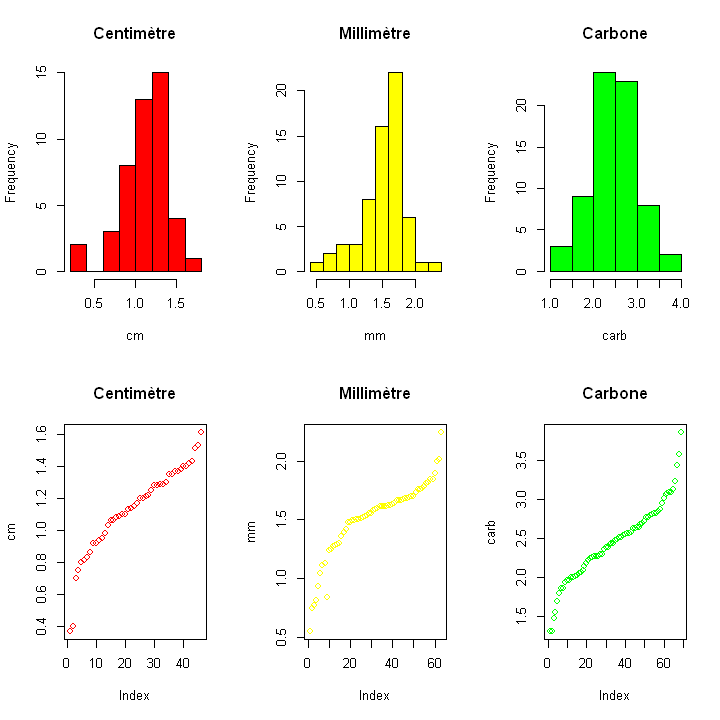

In [18]:
par(mfrow=c(2,3))
options(repr.plot.width=6, repr.plot.height=6)
hist(cm,col="red",main='Centimètre')
hist(mm,col="yellow",main='Millimètre')
hist(carb,col="green",main='Carbone')
plot(cm,col="red",main='Centimètre')
plot(mm,col="yellow",main='Millimètre')
plot(carb,col="green",main='Carbone')

### Estimation et tracé de la fonction $\psi - ln$ ainsi que de son inverse

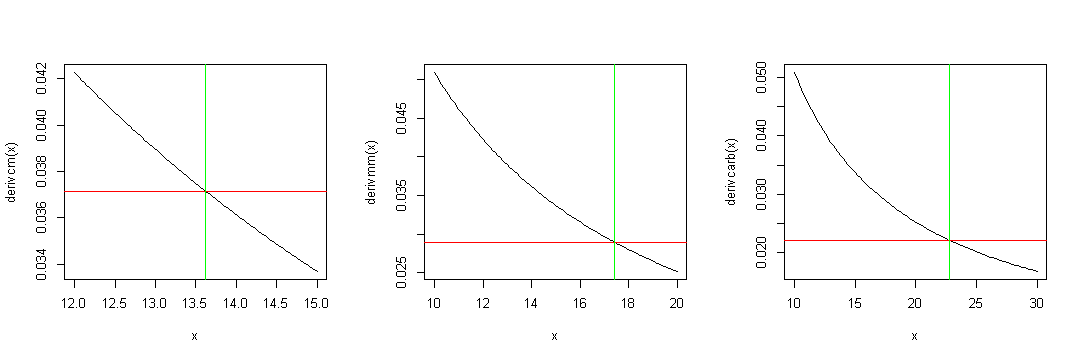

In [22]:
mincm=log(mean(cm))-mean(log(cm)) 
minmm= log(mean(mm))-mean(log(mm))
mincarb=log(mean(carb))-mean(log(carb))


par(mfrow=c(1,3))
options(repr.plot.width=9, repr.plot.height=3)
derivcm <-  function (cm) log(cm)-digamma(cm)
curve(derivcm, 12,15)
abline(h=mincm,col = "red")
invdercm <- uniroot( function(cm) log(cm)-digamma(cm)-mincm,c(1,40))
abline(v=invdercm,col="green")


derivmm <-  function (mm) log(mm)-digamma(mm)
curve(derivmm,10,20)
abline(h=minmm,col = "red")
invdermm <- uniroot( function(mm) log(mm)-digamma(mm)-minmm,c(1,40))
abline(v=invdermm,col="green")


derivcarb <-  function (carb) log(carb)-digamma(carb)
curve(derivcarb,10,30)
abline(h=mincarb,col = "red")
invdercarb <- uniroot( function(carb) log(carb)-digamma(carb)-mincarb,c(1,40))
abline(v=invdercarb,col="green")

In [45]:
mean(carb)/22.8

[1] 0.1076882

In [46]:
mean(cm)/13.62

[1] 0.08296623

In [47]:
mean(mm)/17.44

[1] 0.08640054

## Algorithme dichotomique

### Définition

Un algorithme dichotomique est l'une des nombreuses méthodes d'optimisation afin de trouver le point où la fonction s'annule comme nous le montre le graphique ci-dessous issu de Wikipédia.
Utilisé par exemple pour résoudre $f(x)=0$



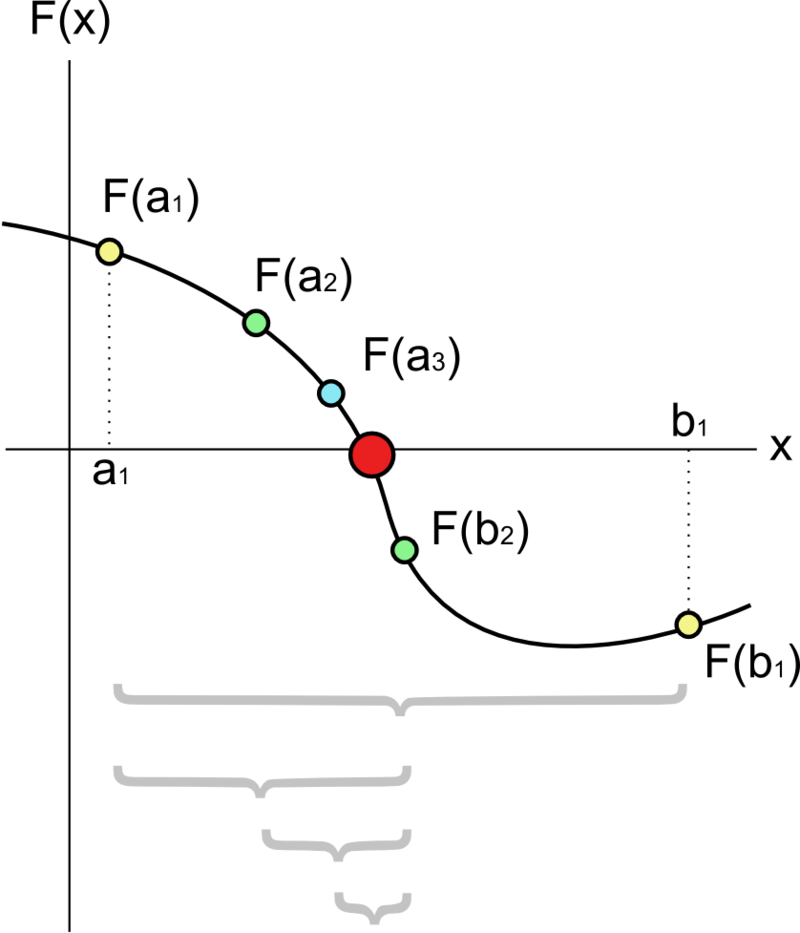

In [2]:
library("IRdisplay")
setwd('C:/Users/Faustine/Desktop/optimisation/')
display_png(file="td/dichotomique.png",width=250,height=250)

### Exemple

On choisit la fonction $f(x)=x-2$ On cherche $f(x)=0$

In [7]:
a=0
b=100
fonct<-function(x) (x-2)
while(b-a>=0.000001){
  m<-(a+b)/2
  if(fonct(m)*fonct(a)>0){
    a=m
  } else{
    b=m
    
  }
}
fonct(m)


[1] 3.278255e-07

Maintenant avec notre fonction $f(x)=log(x)-digamma(x)$

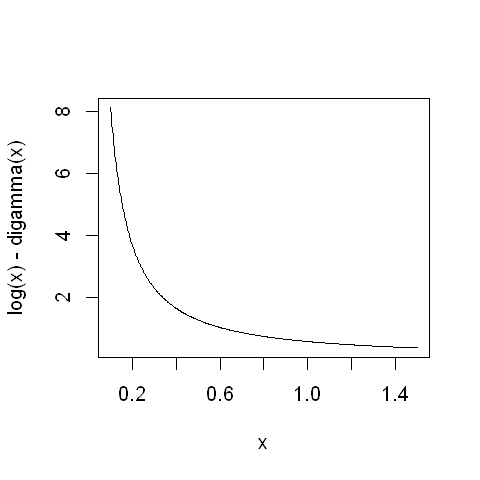

In [8]:
curve(log(x)-digamma(x),0.1,1.5,500)

In [9]:
a=2
b=100
fonct<-function(x) (log(x)-digamma(x))
while(b-a>=0.000001){
  m<-(a+b)/2
  if(fonct(m)*fonct(a)>0){
    a=m
  } else{
    b=m
    
  }
}
fonct(m)


[1] 0.005008333

## Algorithme bitomique

### Définition

L'algorithme bitomique quant à lui coupera l'intervalle en 3 parties de manière symétrique aux bornes a et b

In [ ]:
while(b-a>0.001){
  m<-a+p*(b-a)
  if(funct(a)*funct(m)<=0){
    b<-m
  }else{
      n<-b-p*(b-a)
    if(funct(b)*funct(n)<=0){
  a<-n
  }else{
    b<-m
    a<-n
  }
  }  
  
}

## Minimum d'une fonction 

In [10]:
approx<-function(funct,deriv,dep=1,eps=0.00001,maxiter=50){
  x<-dep
  pas<-1
  niter<-1
  while(abs(pas)>eps & niter<maxiter){
    pas<-funct(x)/deriv(x)
    x<-x-pas
    niter=niter+1
  }
  return(list(root=x,niter=niter))
}

Notre fonction approx va permettre d'approximer un minimum d'une fonction mais cela nécessite de rentrer manuellement sa dérivée

### Exemple avec la fonction $log(x)$

In [11]:
approx(log,function(x)(1/x),0.02,eps=0.01)

$root
[1] 0.9999989

$niter
[1] 7

### Exemple avec notre fonction digamma

In [12]:
fonct<-function(x){
  log(x)-digamma(x)-0.1
}
der<-function(x)((1/x)-trigamma(x))

approx(fonct,der)


$root
[1] 5.160876

$niter
[1] 9

# Etude de l'indice TIOBE

Dans cette partie on a pu apprendre à récupérer directement des données d'un site internet (harvesting). On utilise le package Rvest pour cela.

Code pour récupérer les données du site https://www.tiobe.com/tiobe-index/ :

In [61]:
library(rvest)

webpage<-read_html("https://www.tiobe.com/tiobe-index/")
tbls<-html_nodes(webpage,"table")
head(tbls)

tbls_ls <- webpage %>%
  html_nodes("table") %>%
  .[1] %>%
  html_table(fill = TRUE)
str(tbls_ls)
data<-as.data.frame(tbls_ls)
data<-data[-3]
colnames(data)
names(data)<-c('','','Langage','Ratings','Change')

str(data)
data$Ratings

library(stringr)
data$Ratings<-str_remove(data$Ratings,"%")#on supprime le % qui pose problème pour convertir 
#au format numérique afin de pouvoir manipuler les données

data$Change<-str_remove(data$Change,"%")

data$Ratings<-as.numeric(data$Ratings)

data$Change<-as.numeric(data$Change)

data

{xml_nodeset (4)}
[1] <table class="table table-striped table-top20">\n<thead><tr>\n<th>May 201 ...
[2] <table class="table table-striped">\n<thead><tr>\n<th>Position</th>\n<th> ...
[3] <table class="table table-striped">\n<thead><tr>\n<th>Programming Languag ...
[4] <table class="table table-striped">\n<colgroup>\n<col align="center">\n<c ...

List of 1
 $ :'data.frame':	20 obs. of  6 variables:
  ..$ May 2018            : int [1:20] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ May 2017            : chr [1:20] "1" "2" "3" "4" ...
  ..$ Change              : logi [1:20] NA NA NA NA NA NA ...
  ..$ Programming Language: chr [1:20] "Java" "C" "C++" "Python" ...
  ..$ Ratings             : chr [1:20] "16.380%" "14.000%" "7.668%" "5.192%" ...
  ..$ Change              : chr [1:20] "+1.74%" "+7.00%" "+2.92%" "+1.64%" ...


[1] "May.2018"             "May.2017"             "Programming.Language"
[4] "Ratings"              "Change.1"

'data.frame':	20 obs. of  5 variables:
 $        : int  1 2 3 4 5 6 7 8 9 10 ...
 $        : chr  "1" "2" "3" "4" ...
 $ Langage: chr  "Java" "C" "C++" "Python" ...
 $ Ratings: chr  "16.380%" "14.000%" "7.668%" "5.192%" ...
 $ Change : chr  "+1.74%" "+7.00%" "+2.92%" "+1.64%" ...


[1] "16.380%" "14.000%" "7.668%"  "5.192%"  "4.402%"  "4.124%"  "3.321%" 
 [8] "2.923%"  "1.987%"  "1.182%"  "1.180%"  "1.012%"  "0.998%"  "0.970%" 
[15] "0.939%"  "0.929%"  "0.915%"  "0.909%"  "0.907%"  "0.900%"

,,Langage,Ratings,Change
1,1,Java,16.380,1.74
2,2,C,14.000,7.00
3,3,C++,7.668,2.92
4,4,Python,5.192,1.64
5,5,C#,4.402,0.95
6,6,Visual Basic .NET,4.124,0.73
7,9,PHP,3.321,0.63
8,7,JavaScript,2.923,-0.15
9,-,SQL,1.987,1.99
10,11,Ruby,1.182,-1.25


On obtient alors le classement des langages pour le mois en cours ainsi que son évolution par rapport à l'année précédente.
Aperçu graphique :

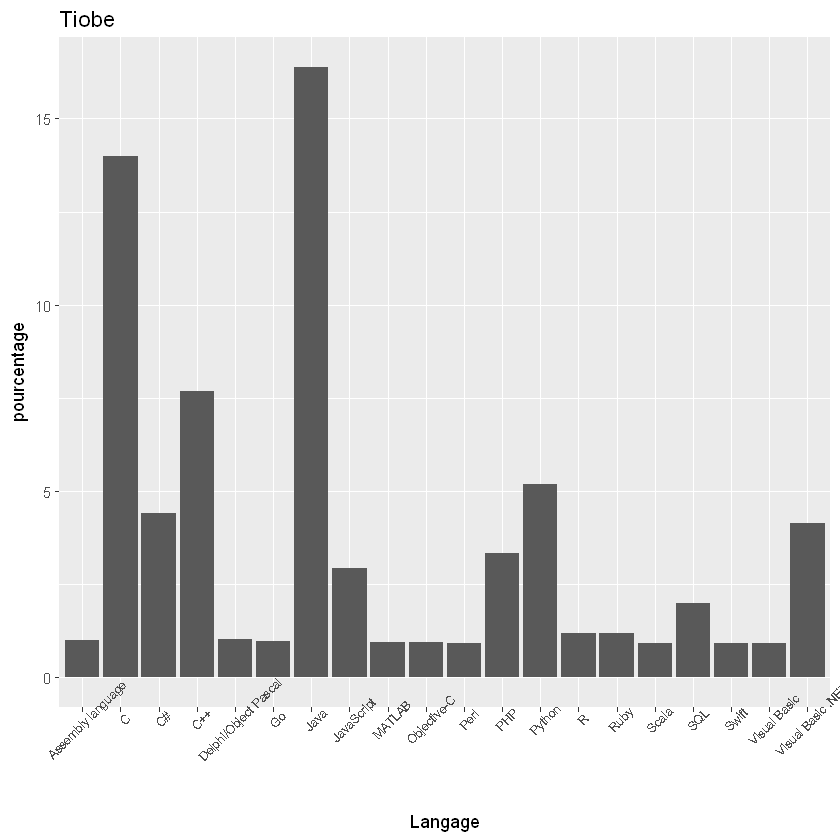

In [15]:
library(ggplot2)

ggplot(data,aes(data$Langage,data$Ratings))+geom_bar(stat="identity")+xlab("Langage")
    +ylab("pourcentage")+labs(title="Tiobe")+theme(axis.text.x = element_text(size=7, angle=45))


Le problème est que le site ne mets en ligne que les donnéees du mois en cours, l'idéal serait de tous les mois récupérer les données et les exploiter bout à bout avec celles obtenues les autres mois.
Il va donc s'agir d'éxécuter notre code précédent qui nettoie les données, met en format numérique, etc ensuite on garde que les colonnes nous intéressant afin de créer un fichier .csv de notre data frame récolté.

In [ ]:
setwd('C:/Users/Faustine/Desktop/optimisation/tiobe')
suppr<-c(1,2)#
data<-data[,-suppr]
write.table(data,file="mai.csv",sep=";")

Tous les mois nous aurons donc un fichier .csv avec les données de ce dernier dans notre dossier. On pourra alors traiter l'intégralité de nos données avec la boucle suivante qui lit tous nos fichiers csv du dossier.

In [ ]:
files<-list.files(pattern = ".csv")
DF<-NULL
for(f in files){
  dat<-read.table(f,sep=";",header=T)
  DF<-cbind(DF,dat)
}

# Ajustement d'un modèle de régression exponentiel

On considère le modèle suivant $Y=\beta\exp(\alpha x)+E$

Avec $E\sim \mathcal{N}(0,\sigma²)$

Ce modèle n'est pas un modèle linéaire en effect la variable Y dépend ici de la variable explicative x, cette dépendance est exponentielle et non linéaire.
On va donc linéarisé le modèle afin d'appliquer une régression linéaire classique. On ne tiendra pas compte de $E$.

$log(Y)=log(\beta)+log(\alpha x)$ 

On utilisera un jeu de données de l'Université de PennState pour nos estimations et comparaisons.

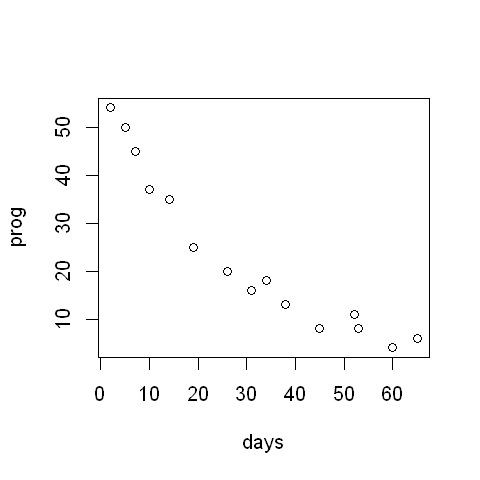

In [19]:
setwd('C:/Users/Faustine/Desktop/optimisation')
data<-read.csv('Classeur1.csv',sep=';',header=T,row.names = 1)
options(repr.plot.width=4, repr.plot.height=4)
plot(data)

Estimation avec la linéarisation faite au préalable:

In [27]:
est<-lm(log(data$prog)~data$days)
est
exp(est$coeff[1])


Call:
lm(formula = log(data$prog) ~ data$days)

Coefficients:
(Intercept)    data$days  
    4.03716     -0.03797  


(Intercept) 
   56.66512

On comparera avec les estimateurs suivants obtenus sans linéarisation prélable grâce à la fonction $nls$.

In [25]:
est2<-nls(prog~b0*exp(b1*days),data =data,start =list(b0=50,b1=-0.1))
est2

Nonlinear regression model
  model: prog ~ b0 * exp(b1 * days)
   data: data
      b0       b1 
58.60656 -0.03959 
 residual sum-of-squares: 49.46

Number of iterations to convergence: 5 
Achieved convergence tolerance: 2.555e-06

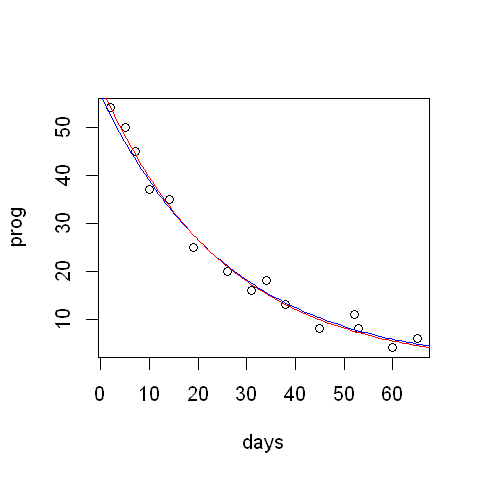

In [26]:
plot(data)
curve(56.66*exp(x*-0.03797),0,70,col='blue',add=T)#linéarisé
curve(58.60656*exp(x*-0.03959),0,70,col='red',add=T)#nls

On constate que les 2 régressions donnent des résultats extrêmement proches mais la différence est tout de même perceptible comme le montre notre graphique.

Dans un modèle de ce type : $Y=\beta\exp(\alpha x)$ la fonction glm peut nous permettre de ne pas passer par $nls$.

In [29]:
est2<-glm(prog~days,data=data,family=gaussian(link='log'))
est2
exp(4.07085)



Call:  glm(formula = prog ~ days, family = gaussian(link = "log"), data = data)

Coefficients:
(Intercept)         days  
    4.07085     -0.03959  

Degrees of Freedom: 14 Total (i.e. Null);  13 Residual
Null Deviance:	    3943 
Residual Deviance: 49.46 	AIC: 66.46

[1] 58.60676

On retrouve alors exactement les même résultats qu'avec $nls$.

## Autre exemple

(Intercept) 
  0.5830483


Call:
lm(formula = log(data$Relative.Risk.of.Crashing) ~ data$BAC)

Coefficients:
(Intercept)     data$BAC  
    -0.5395      23.8176  


Nonlinear regression model
  model: Relative.Risk.of.Crashing ~ b0 * exp(b1 * BAC)
   data: data
     b0      b1 
 0.5588 24.7785 
 residual sum-of-squares: 28.51

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.948e-06


Call:  glm(formula = Relative.Risk.of.Crashing ~ BAC, family = gaussian(link = "log"), 
    data = data)

Coefficients:
(Intercept)          BAC  
     -0.582       24.779  

Degrees of Freedom: 11 Total (i.e. Null);  10 Residual
Null Deviance:	    11020 
Residual Deviance: 28.51 	AIC: 50.44

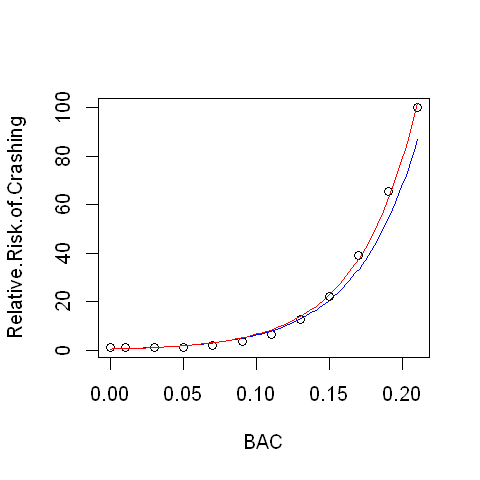

In [46]:
data<-read.table('bac.csv',sep=";",header=T)
plot(data)

est1<-lm(log(data$Relative.Risk.of.Crashing)~data$BAC)

exp(est1$coeff[1])

est2<-nls(Relative.Risk.of.Crashing~b0*exp(b1*BAC),data =data,start =list(b0=-5,b1=-0.1))


est3<-glm(Relative.Risk.of.Crashing~BAC,data=data,family=gaussian(link='log'))  

est1
est2
est3
plot(data)
curve(0.583*exp(x*23.8176),col='blue',add=T)
curve(0.5588*exp(x*24.7785),col='red',add=T)

In [48]:
error <- est1$residuals  
lm_error <- sqrt(mean(error^2))   #0.27
lm_error

error2=data$Relative.Risk.of.Crashing-predict(est2)
nlm_error <- sqrt(mean(error2^2)) #1.54
nlm_error

[1] 0.2778

[1] 1.541494

La régression avec le modèle non linéaire (nls) a une erreur beaucoup plus élevée que celle faite en linéarisant, 0.2777 et 1.541, on en conclue que dans ce cas précis que le modèle en linéarisant est plus adapté.

# Etude de la régression en norme L1

On considère le modèle de régression linéaire à 2 paramètres: $Y=\beta0+\beta1x+E$ avec $E\sim \mathcal{N}(0,\sigma²)$ en conditions dites normales.
Cependant une faible proportion $\pi$ des erreurs sont anormalement plus élevées et suivent une loi dont la variance est plus élevée.

On va tirer un échantillon en conditions normales et estimer nos 2 paramètres $\beta0$ et $\beta1$ :


Call:
lm(formula = reg[, 2] ~ reg[, 1])

Coefficients:
(Intercept)     reg[, 1]  
     0.9827       1.9806  


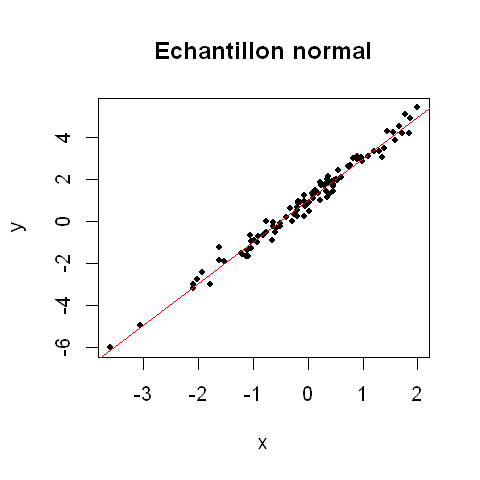

In [17]:
ech <- function(n , beta0 = 1, beta1 = 2, sigma = 1)
{

  x<- rnorm(n)
  y <- beta0 + beta1 * x + rnorm(n, 0, sigma)
  return(cbind(x,y))
}
reg<-ech(n=100,sigma=0.3)
options(repr.plot.width=4, repr.plot.height=4)
plot(reg[,1],reg[,2],xlab="x",ylab="y",pch=20,main="Echantillon normal")
abline(lm(reg[,2] ~ reg[,1]), col = "red")
lm(reg[,2] ~ reg[,1])

Avec notre échantillon dit normal on obient le modèle suivant : $Y=1.98x+0.98+E$ avec $E\sim \mathcal{N}(0,0.2²)$

Maintenant nous allons tiré un autre échantillon mais cette fois avec E ayant une variance beaucoup plus élevée mais seulement une petite quantité.


Call:
lm(formula = reg[, 2] ~ reg[, 1])

Coefficients:
(Intercept)     reg[, 1]  
      1.283        2.151  


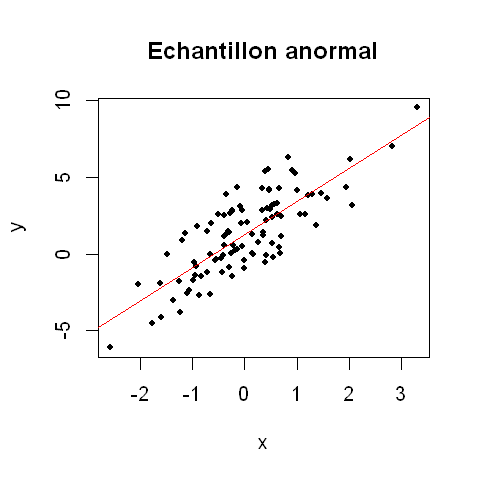

In [19]:
ech2 <- function(n , beta0 = 1, beta1 = 2, sigma = 1,nn)
{
  
  x<- rnorm(n)
  y <- beta0 + beta1 * x + rnorm(nn, 0, sigma)
  return(cbind(x,y))
}
reg<-ech2(n=100,nn=20,sigma=2)
options(repr.plot.width=4, repr.plot.height=4)
plot(reg[,1],reg[,2],xlab="x",ylab="y",pch=20,main="Echantillon anormal")
abline(lm(reg[,2] ~ reg[,1]), col = "red")
lm(reg[,2] ~ reg[,1])

Avec notre échantillon dit anormal on obient le modèle suivant : $Y=2.15x+1.283+E$ avec $E\sim \mathcal{N}(0,2²)$

Avec $n=1000$


Call:
lm(formula = reg[, 2] ~ reg[, 1])

Coefficients:
(Intercept)     reg[, 1]  
     0.9889       2.0082  


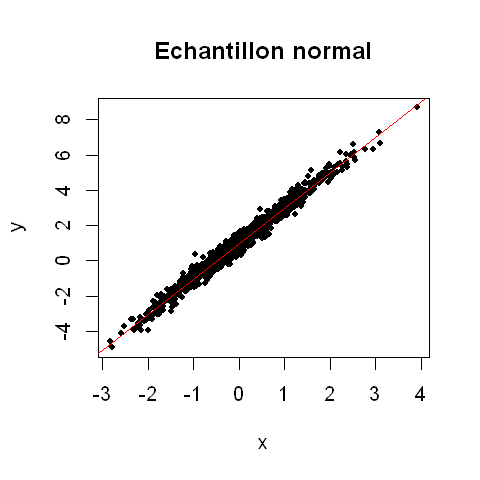

In [21]:
ech <- function(n , beta0 = 1, beta1 = 2, sigma = 1)
{

  x<- rnorm(n)
  y <- beta0 + beta1 * x + rnorm(n, 0, sigma)
  return(cbind(x,y))
}
reg<-ech(n=1000,sigma=0.3)
options(repr.plot.width=4, repr.plot.height=4)
plot(reg[,1],reg[,2],xlab="x",ylab="y",pch=20,main="Echantillon normal")
abline(lm(reg[,2] ~ reg[,1]), col = "red")
lm(reg[,2] ~ reg[,1])


Call:
lm(formula = reg[, 2] ~ reg[, 1])

Coefficients:
(Intercept)     reg[, 1]  
      1.449        2.188  


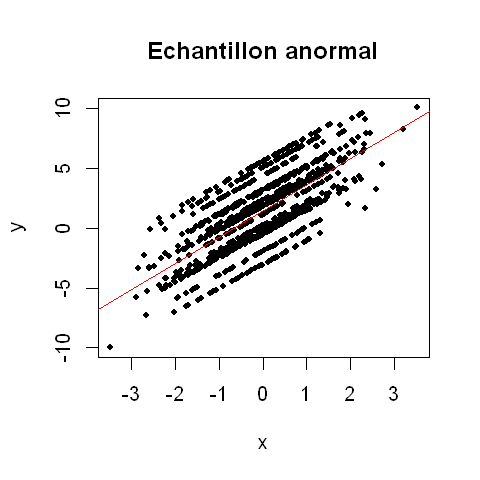

In [24]:
ech2 <- function(n , beta0 = 1, beta1 = 2, sigma = 1,nn)
{
  
  x<- rnorm(n)
  y <- beta0 + beta1 * x + rnorm(nn, 0, sigma)
  return(cbind(x,y))
}
reg<-ech2(n=1000,nn=20,sigma=2)
options(repr.plot.width=4, repr.plot.height=4)
plot(reg[,1],reg[,2],xlab="x",ylab="y",pch=20,main="Echantillon anormal")
abline(lm(reg[,2] ~ reg[,1]), col = "red")
lm(reg[,2] ~ reg[,1])

## Critère d'ajustement des moindres carrés

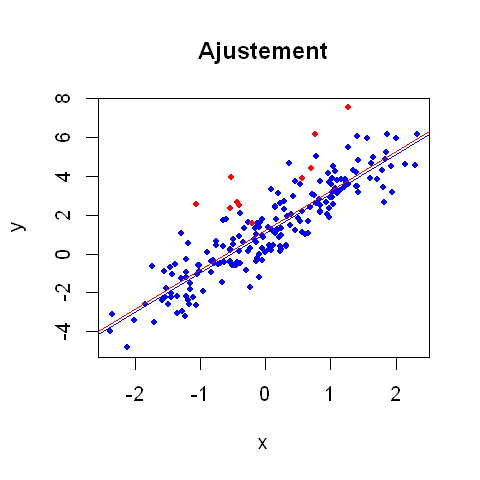

In [28]:
echantillon <- function(n = 200, beta0 = 1, beta1 = 2, sigma = 1, pi = 0, mu = 0, sigmacarre = 1)
{
  
  x <- rnorm(n)
  e <- rnorm(n, 0, sigma)
 
  cont <- which(as.logical(rbinom(n, 1, pi)))
  ncont <- length(cont)
  if (ncont != 0) e[cont] <- rnorm(ncont, mu, sigmacarre)
  return(list(data = cbind(x, beta0 + beta1 * x + e), cont = cont))
}
resultat <- echantillon(pi = 0.05, mu = 3)
plot(resultat$data[,1], resultat$data[,2], pch = 20, col = "blue",xlab="x",ylab="y",main="Ajustement")
points(resultat$data[resultat$cont,1], resultat$data[resultat$cont,2], col = "red", pch = 20)
abline(lm(resultat$data[,2] ~ resultat$data[,1]), col = "red")
abline(lm(resultat$data[-resultat$cont,2] ~ resultat$data[-resultat$cont,1]), col = "blue")

En rouge on retrouve les points appartenants à l'échantillon anormal ne pouvant être inclu dans notre régression "normale", on constante que sur un échantillon $n=200$ que cela ne concerne que 10 points.

## Régression en norme L1

### Définition

La norme L1 en régression permet d'augmenter la robustesse des moindres carrés, il s'agit d'un algorithme qui a pour but de minimiser dans notre cas les RSS. 
Formule :$RSS=\sum _{i=1}^{n}(y_{i}-f(x_{i}))^{2}$

### Algorithme d'optimisation L1

Dans $R$ la fonction mettant en oeuvre l'algorithme de Nelder et Mead est $optim$

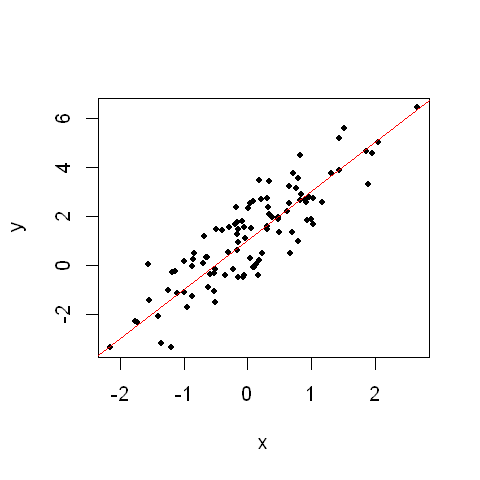

In [42]:
n <- 100
x<- rnorm(n)
e<- rnorm(n, 0, 1)
beta0<-1
beta1<-2
data<-as.data.frame(cbind(x, beta0+beta1*x+e))
y<-data$V2
min.RSS <- function(beta) {
 sum((beta0 + beta1 * x - y)^2)
}

result <- optim(c(-50,50), min.RSS,method = "Nelder-Mead")

plot(y ~ x,data,pch=20)
abline(a = beta0, b = beta1, col = "red")

La fonction $optim$ dans $R$ peut également servir dans le cas d'estimation de maximum de vraisemblance également.

# Optimisation en Analyse de données

Le critère habituellement minimisé en ACP pour les individus est :
$\sum_{r=1}^{n}d(GM_rGH_r)^2$

Pour les variables :
$\lambda_{max}\lambda^T\mathbb{V}{X}\lambda$

Combinaison linéaire maximisant les covariances:
$\sum_{i=1}^{p}\lambda_icor(X_i,X_j)$

## Exemple d'ACP

Pour cela on utilisera les données d'Orheim _Principal Variables_ par __G.P. McCabe__.

In [12]:
setwd('C:/Users/Faustine/Desktop/optimisation/td')
data<-c(.961, .419, -.010, .926, .373, .328, .030, .304,
       .454, -.071, .879, .370, .280, -.032, .269,
       -.058, .425, .657, .465, .061, .225,
       -.050, .195, .005, .629, .103,
       .336 ,.416 ,.024, .272,
       .424, .093, .185,
       .113, .261,
       .489)
mat<-diag(1,ncol=9,nrow=9)
mat[upper.tri(mat)]<-data

mat[lower.tri(mat)]<-data

colnames(mat)<-c("Al","SI", "S", "CA", "TI", "FE","SE", "SR", "BA")  
rownames(mat)<-colnames(mat)
mat

,Al,SI,S,CA,TI,FE,SE,SR,BA
Al,1.000,0.961,0.419,0.926,0.030,0.879,-0.058,-0.050,0.024
SI,0.961,1.000,-0.010,0.373,0.304,0.370,0.425,0.195,0.272
S,0.419,0.454,1.000,0.328,0.454,0.280,0.657,0.005,0.424
CA,-0.010,-0.071,-0.058,1.000,-0.071,-0.032,0.465,0.629,0.093
TI,0.926,0.879,0.425,-0.050,1.000,0.269,0.061,0.103,0.185
FE,0.373,0.370,0.657,0.195,0.336,1.000,0.225,0.336,0.113
SE,0.328,0.280,0.465,0.005,0.416,0.424,1.000,0.416,0.261
SR,0.030,-0.032,0.061,0.629,0.024,0.093,0.113,1.000,0.489
BA,0.304,0.269,0.225,0.103,0.272,0.185,0.261,0.489,1.000


Afin de procéder à l'ACP on utilise le pacake $FactoMineR$.

In [6]:
library(FactoMineR)

In [25]:
orheim_pca<-PCA(mat)
summary(orheim_pca,nbelements=3,ncp=3)


Call:
PCA(X = mat) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               3.847   2.100   1.233   0.791   0.552   0.429   0.045
% of var.             42.740  23.339  13.701   8.792   6.135   4.764   0.500
Cumulative % of var.  42.740  66.078  79.779  88.571  94.706  99.471  99.971
                       Dim.8
Variance               0.003
% of var.              0.029
Cumulative % of var. 100.000

Individuals (the 3 first)
       Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr
Al |  3.681 |  2.127 13.064  0.334 | -2.887 44.075  0.615 |  0.309  0.858
SI |  2.307 |  1.158  3.873  0.252 | -0.701  2.598  0.092 | -1.100 10.893
S  |  2.594 |  0.901  2.343  0.121 |  1.494 11.804  0.332 |  1.244 13.939
     cos2  
Al  0.007 |
SI  0.227 |
S   0.230 |

Variables (the 3 first)
      Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr   cos2  
Al |  0.892 20.676  0.795 | -0.240  2.740  0.058 | -0.317  8.141  0.100

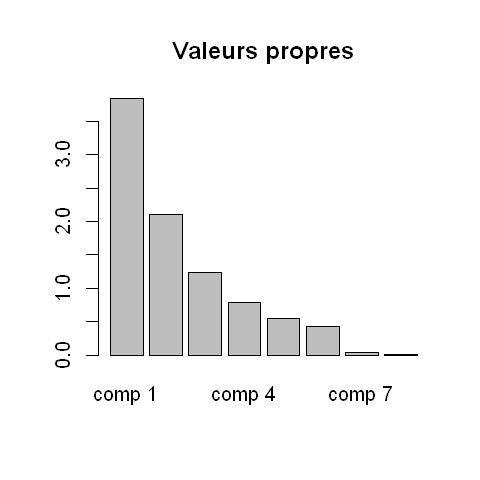

In [26]:
options(repr.plot.width=4, repr.plot.height=4)
barplot(orheim_pca$eig[,1], main="Valeurs propres")

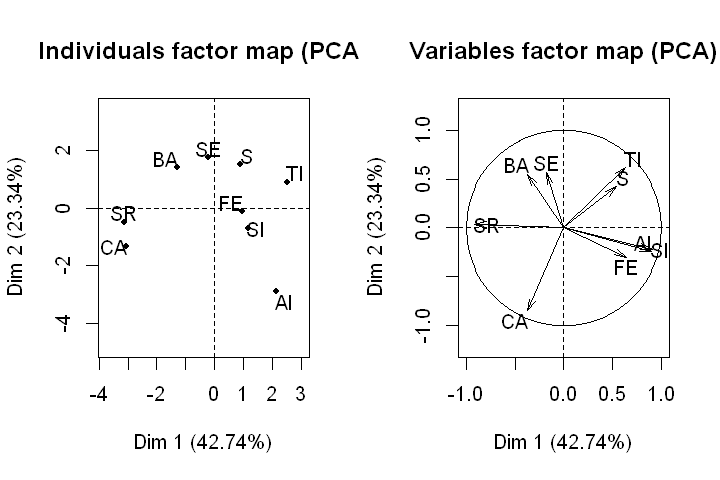

In [23]:
par(mfrow=c(1,2))
options(repr.plot.width=6, repr.plot.height=4)
plot(orheim_pca)
plot(orheim_pca,choix="var")

Graphique des individus et à droite celles des variables, certains sont bien reprénsentés tels que SI,SR.

In [24]:
dimdesc(orheim_pca,axes=1:2)

,correlation,p.value
SI,0.9004709,0.0009280515
Al,0.8918174,0.0012316938
SR,-0.9103662,0.0006497138
,correlation,p.value
CA,-0.8476428,0.003903111


# Conclusion
L'ensemble du rapport a été fait à l'aide de l'outil Jupyter Notebook (avec le package R Essentials) permettant d'utiliser du LATEX ou RMarkdown.Cet outil est bien plus agréable à utiliser que Rstudio.